<h3><center> Bartosz Cywiński, Łukasz Staniszewski </center></h3>
<h1><center> Analiza eksploracyjna danych - tabela products, sessions </center><h1>

In [328]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Import tabeli

In [329]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from copy import copy

In [330]:
sessions_data_json = pd.read_json(path_or_buf='../data/raw/sessions.jsonl', lines=True)
products_data_json = pd.read_json(path_or_buf='../data/raw/products.jsonl', lines=True)

df_sessions = pd.DataFrame(sessions_data_json)
df_products = pd.DataFrame(products_data_json)

In [331]:
df_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2021-07-28 15:47:21,102,1283,VIEW_PRODUCT,5,NaN
1,124,2021-07-28 15:47:40,102,1283,BUY_PRODUCT,5,20001.0
2,125,2021-09-12 16:43:16,102,1076,VIEW_PRODUCT,0,NaN
3,125,2021-09-12 16:46:24,102,1080,VIEW_PRODUCT,0,NaN
4,125,2021-09-12 16:48:08,102,1079,VIEW_PRODUCT,0,NaN
...,...,...,...,...,...,...,...
34999,9648,2021-03-07 07:48:53,301,1292,VIEW_PRODUCT,0,NaN
35000,9648,2021-03-07 07:52:54,301,1285,VIEW_PRODUCT,0,NaN
35001,9648,2021-03-07 07:54:47,301,1288,VIEW_PRODUCT,0,NaN
35002,9649,2021-10-12 00:19:45,301,1040,VIEW_PRODUCT,20,NaN


In [332]:
df_products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


# 2. Braki w danych

In [333]:
df_sessions.isnull().sum()

session_id              0
timestamp               0
user_id                 0
product_id              0
event_type              0
offered_discount        0
purchase_id         29479
dtype: int64

In [334]:
df_products.isnull().sum()

product_id       0
product_name     0
category_path    0
price            0
dtype: int64

+ Jak widać, jedyne nulle jakie posiadamy, nie są związane z brakami danych - związane są z logiką biznesową sklepu - nie będziemy zapisywać sprzedaży, jeśli nic nie zostało kupione.
+ W dalszej analizie nie będzie nam potrzebna informacja o id_zakupu - wyrzućmy.

In [335]:
df_sessions = df_sessions.drop(columns='purchase_id')

In [336]:
df_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount
0,124,2021-07-28 15:47:21,102,1283,VIEW_PRODUCT,5
1,124,2021-07-28 15:47:40,102,1283,BUY_PRODUCT,5
2,125,2021-09-12 16:43:16,102,1076,VIEW_PRODUCT,0
3,125,2021-09-12 16:46:24,102,1080,VIEW_PRODUCT,0
4,125,2021-09-12 16:48:08,102,1079,VIEW_PRODUCT,0
...,...,...,...,...,...,...
34999,9648,2021-03-07 07:48:53,301,1292,VIEW_PRODUCT,0
35000,9648,2021-03-07 07:52:54,301,1285,VIEW_PRODUCT,0
35001,9648,2021-03-07 07:54:47,301,1288,VIEW_PRODUCT,0
35002,9649,2021-10-12 00:19:45,301,1040,VIEW_PRODUCT,20


# 2. Typy danych

+ Typy danych:

In [337]:
df_sessions.dtypes

session_id                   int64
timestamp           datetime64[ns]
user_id                      int64
product_id                   int64
event_type                  object
offered_discount             int64
dtype: object

In [338]:
df_products.dtypes

product_id         int64
product_name      object
category_path     object
price            float64
dtype: object

+ A także podstawowe informacje na temat numerycznych atrybutów tabel:

In [339]:
df_products.describe()

,product_id,price
count,319.000000,319.000000
mean,1160.000000,247.787962
std,92.231593,813.788548
min,1001.000000,1.000000
25%,1080.500000,24.990000
50%,1160.000000,41.000000
75%,1239.500000,92.995000
max,1319.000000,7639.000000


In [340]:
df_sessions.describe()

,session_id,user_id,product_id,offered_discount
count,35004.000000,35004.000000,35004.000000,35004.000000
mean,4865.495572,197.865730,1129.404954,5.177551
std,2760.309751,59.231817,119.334323,7.161938
min,124.000000,102.000000,1001.000000,0.000000
25%,2483.750000,147.000000,1036.000000,0.000000
50%,4846.000000,193.000000,1067.000000,0.000000
75%,7248.250000,247.000000,1278.000000,10.000000
max,9650.000000,301.000000,1319.000000,20.000000


## 3. Eksploracja kategorii produktów

In [341]:
df_products['category_path'].unique()

array(['Telefony i akcesoria;Telefony stacjonarne',
       'Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne',
       'Gry i konsole;Gry na konsole;Gry Xbox 360',
       'Komputery;Monitory;Monitory LCD',
       'Telefony i akcesoria;Telefony komórkowe',
       'Gry i konsole;Gry na konsole;Gry PlayStation3',
       'Gry i konsole;Gry komputerowe',
       'Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące',
       'Sprzęt RTV;Video;Odtwarzacze DVD',
       'Komputery;Tablety i akcesoria;Tablety',
       'Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4',
       'Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D',
       'Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV',
       'Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe',
       'Sprzęt RTV;Audio;Słuchawki'], dtype=object)

+ Zależnośc liczby produktów w sklepie od danej ściezki kategorii:

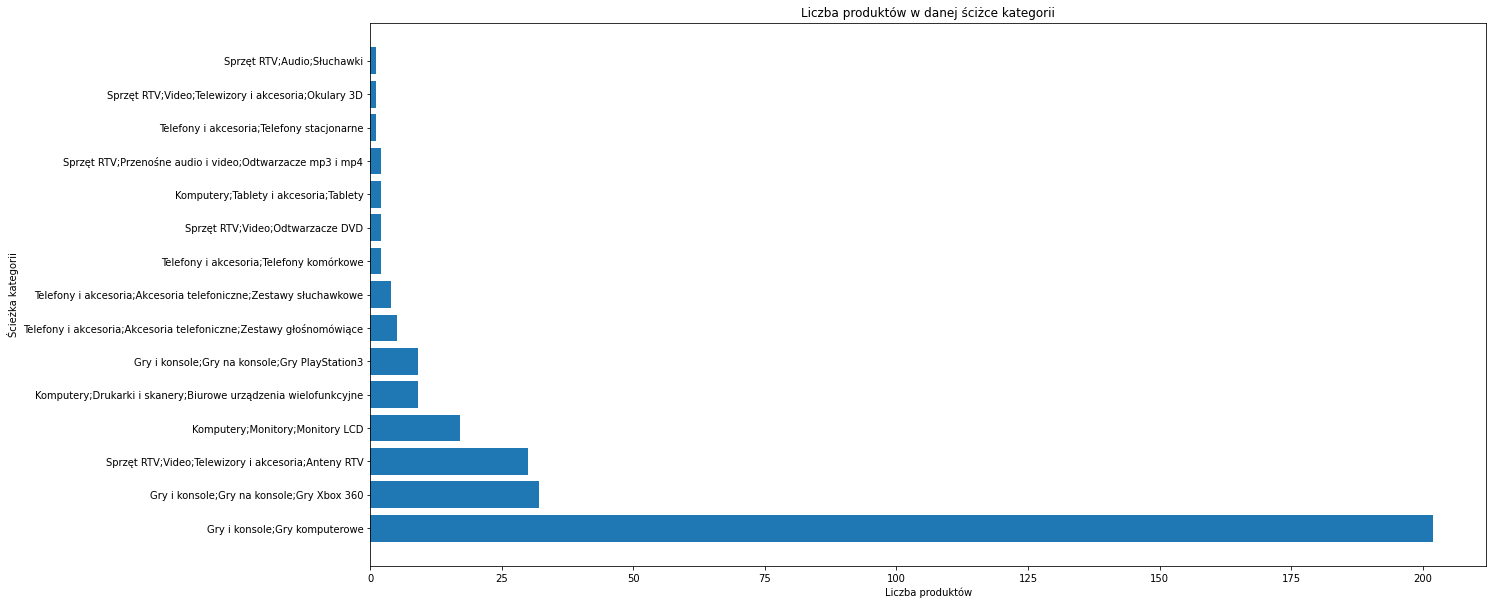

In [342]:
plt.figure(figsize=(20, 10))
plt.barh(df_products['category_path'].value_counts().keys(), df_products['category_path'].value_counts())
plt.title('Liczba produktów w danej ściżce kategorii')
plt.xlabel('Liczba produktów')
plt.ylabel('Ścieżka kategorii')
plt.show()

+ Zależność średniej ceny produktów z danej ściezki kategorii:

In [343]:
df_categories_means = df_products.groupby('category_path')['price'].mean()
df_categories_means

category_path
Gry i konsole;Gry komputerowe                                          37.995248
Gry i konsole;Gry na konsole;Gry PlayStation3                          87.630000
Gry i konsole;Gry na konsole;Gry Xbox 360                              76.674375
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne       4238.504444
Komputery;Monitory;Monitory LCD                                       955.805294
Komputery;Tablety i akcesoria;Tablety                                2066.995000
Sprzęt RTV;Audio;Słuchawki                                            553.000000
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               71.850000
Sprzęt RTV;Video;Odtwarzacze DVD                                      151.000000
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    110.775667
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                     99.990000
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące     217.350000
Telefony i akc

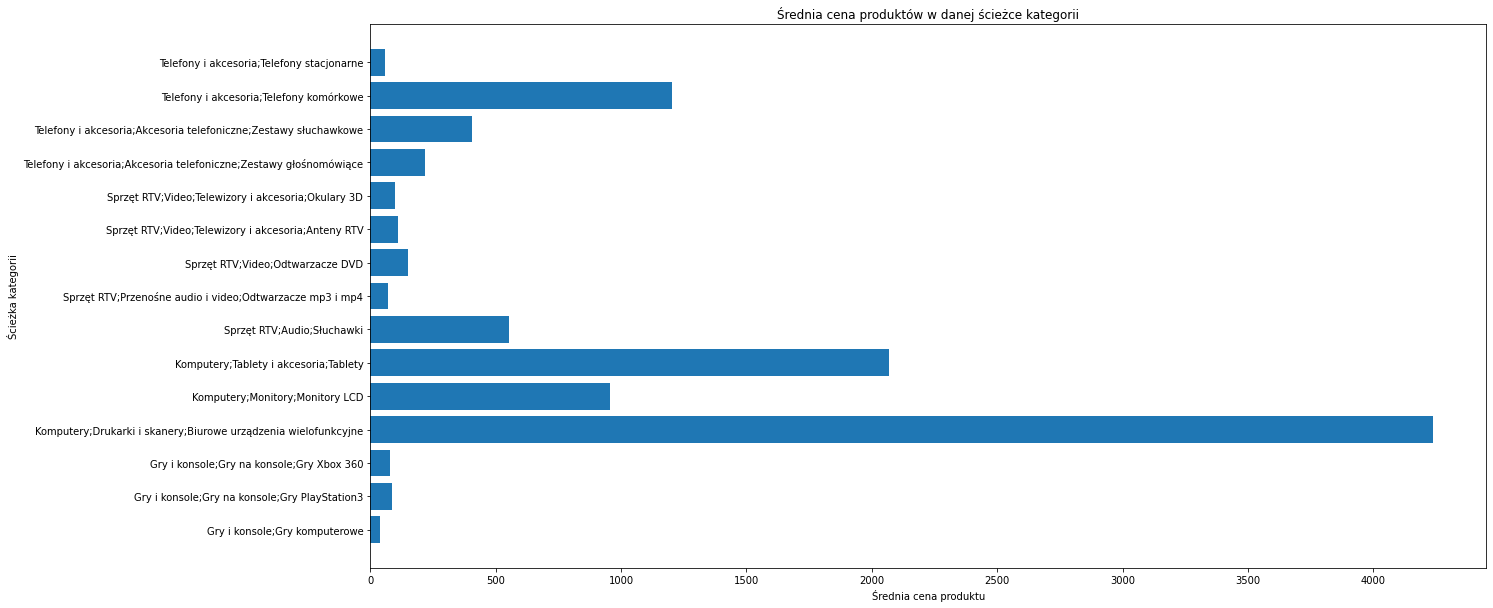

In [344]:
plt.figure(figsize=(20, 10))
plt.barh(df_products['category_path'].value_counts().keys().sort_values(), df_categories_means)
plt.title('Średnia cena produktów w danej ścieżce kategorii')
plt.xlabel('Średnia cena produktu')
plt.ylabel('Ścieżka kategorii')
plt.show()

+ Głębsze rozdzielenie kategorii - poza kategoriami na najniższym poziomie, dodawane sa te z wyższych poziomów:

In [345]:
df_products_categorical = df_products.category_path.str.get_dummies(';')
df_products_categorical.rename({name: "Kategoria:" + name for name in df_products_categorical.columns},axis='columns')

,Kategoria:Akcesoria telefoniczne,Kategoria:Anteny RTV,Kategoria:Audio,Kategoria:Biurowe urządzenia wielofunkcyjne,Kategoria:Drukarki i skanery,Kategoria:Gry PlayStation3,Kategoria:Gry Xbox 360,Kategoria:Gry i konsole,Kategoria:Gry komputerowe,Kategoria:Gry na konsole,...,Kategoria:Słuchawki,Kategoria:Tablety,Kategoria:Tablety i akcesoria,Kategoria:Telefony i akcesoria,Kategoria:Telefony komórkowe,Kategoria:Telefony stacjonarne,Kategoria:Telewizory i akcesoria,Kategoria:Video,Kategoria:Zestawy głośnomówiące,Kategoria:Zestawy słuchawkowe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
315,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
316,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
317,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


+ Statystyka liczby produktów w ramach wszystkich kategorii/podkategorii:

In [346]:
rows_on_cat = {column_name: df_products_categorical.loc[df_products_categorical[column_name] == 1] for column_name in df_products_categorical.columns}

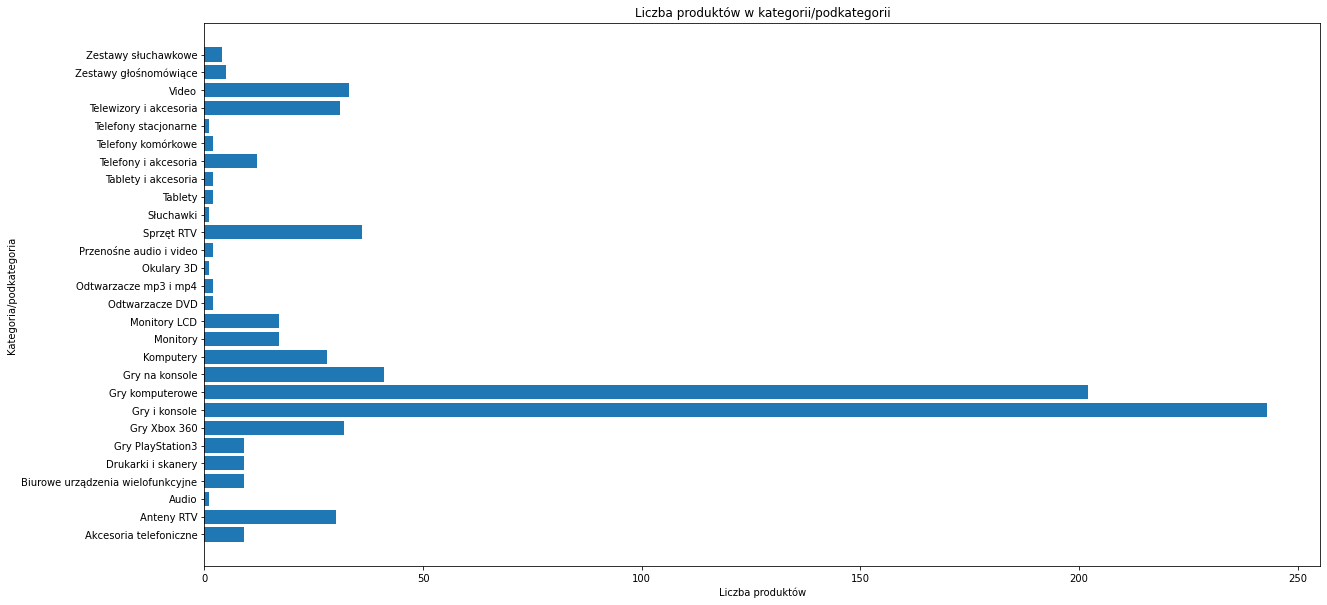

In [347]:
plt.figure(figsize=(20, 10))
plt.barh(list(rows_on_cat.keys()), [len(rows_on_cat[key]) for key in rows_on_cat.keys()])
plt.title('Liczba produktów w kategorii/podkategorii')
plt.xlabel('Liczba produktów')
plt.ylabel('Kategoria/podkategoria')
plt.show()

In [348]:
new_concatenated = pd.concat([df_products, df_products_categorical], axis=1)

In [349]:
new_concatenated.head()

,product_id,product_name,category_path,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Słuchawki,Tablety,Tablety i akcesoria,Telefony i akcesoria,Telefony komórkowe,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


+ Statystyka średniej ceny produktów w ramach wszystkich kategorii/podkategorii:

In [350]:
rows_on_cat = {column_name: new_concatenated.loc[new_concatenated[column_name] == 1] for column_name in df_products_categorical.columns}

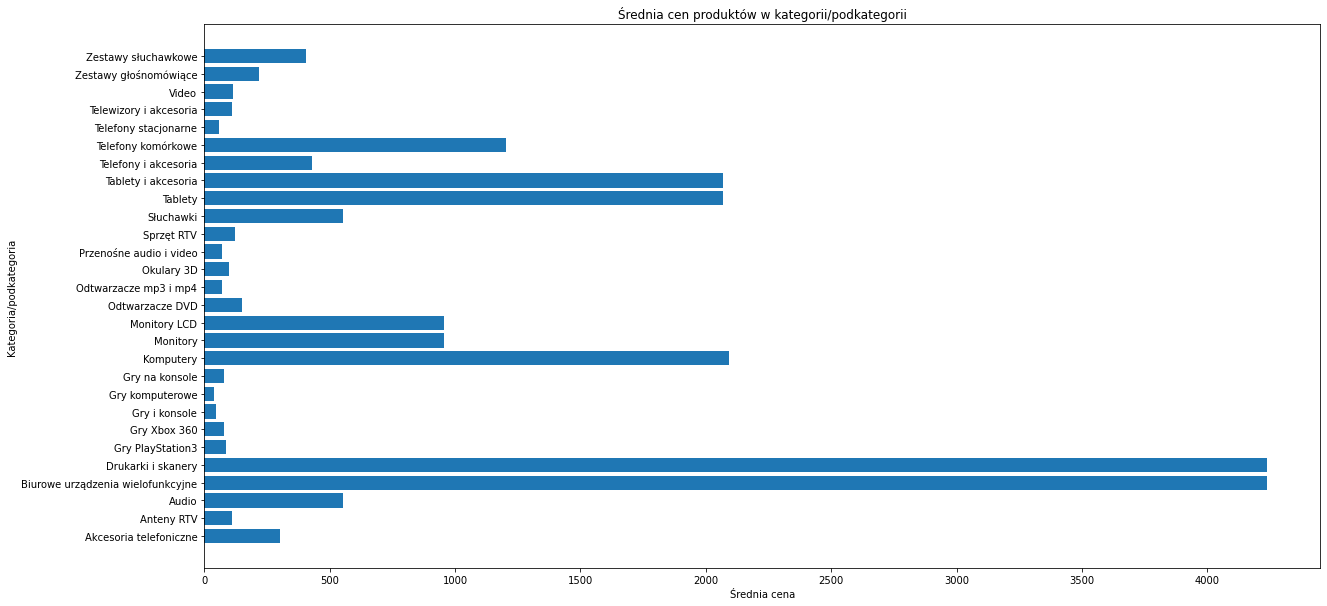

In [351]:
plt.figure(figsize=(20,10))
plt.barh(list(df_products_categorical.keys()), [rows_on_cat[name]['price'].mean() for name in rows_on_cat.keys()])
plt.title('Średnia cen produktów w kategorii/podkategorii')
plt.xlabel('Średnia cena')
plt.ylabel('Kategoria/podkategoria')
plt.show()

+ Sprawdzenie czy nie ma danych odstających:

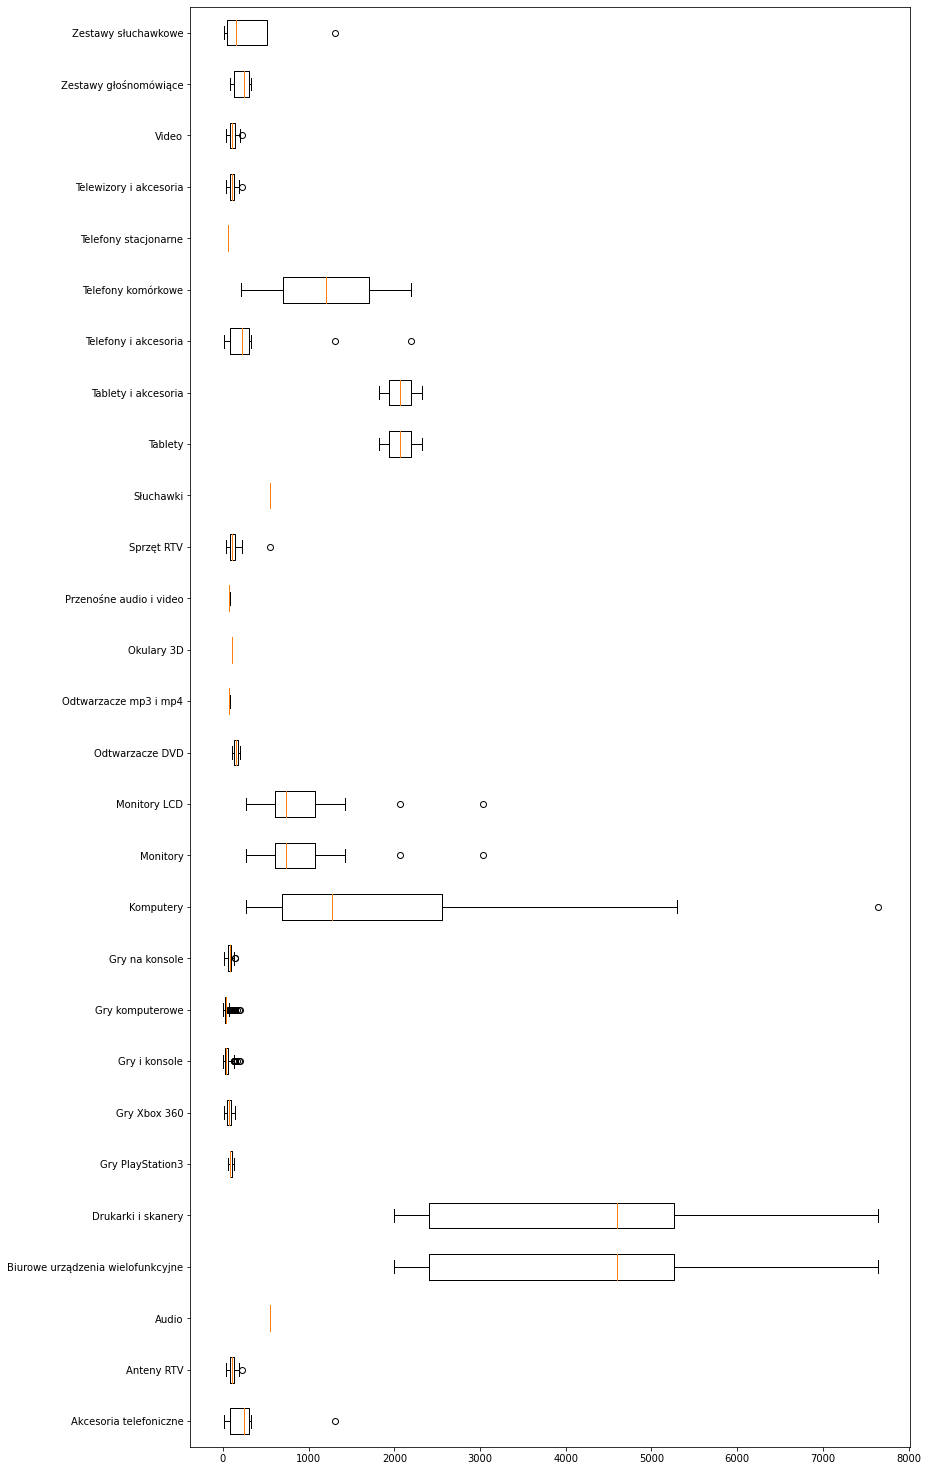

In [352]:
x = []
for category_name in rows_on_cat.keys():
    x.append(rows_on_cat[category_name]['price'])

fig_box = plt.figure(figsize =(10, 20))
ax = fig_box.add_axes([0, 0, 1, 1])
bp = ax.boxplot(x, vert=False, labels = list(df_products_categorical.keys()))
plt.show()

+ Można zauważyć, że pod względem kategorii nie ma odstających wartości cen.

## 4. Zależność stanu zakończenia sesji od pory dnia

+ Agregacja sesji pod względem zakończenia, wydzielenie znacznika czasu pod względem czasu jaki upłynął w ramach sesji oraz jej początku i końca:

In [353]:
agg_func_sess_prod = {
    'timestamp' : lambda t: [(t.max() - t.min()).seconds, t.min(), t.max()],
    'user_id' : 'first',
    'product_id' : 'unique',
    'offered_discount' : 'first',
    'event_type' : lambda e: 1 if len(e.unique()) > 1 else 0
}
agg_sess_prod_df = df_sessions.groupby(df_sessions['session_id']).aggregate(agg_func_sess_prod)
agg_sess_prod_df.rename(columns={'event_type' : 'purchased'}, inplace=True)

In [354]:
timestamp_dict = [{'session_length' : x[0], 'session_start' : x[1], 'session_end' : x[2]} for x in agg_sess_prod_df['timestamp']]
timestamp_df = pd.DataFrame(timestamp_dict)
agg_sess_prod_df = pd.concat([agg_sess_prod_df, timestamp_df], axis=1, join="inner")
agg_sess_prod_df.drop(columns=['timestamp'], inplace=True)
agg_sess_prod_df.index.name = 'session_id'

In [355]:
agg_sess_prod_df.head()

,user_id,product_id,offered_discount,purchased,session_length,session_start,session_end
session_id,,,,,,,
124,102,[1283],5,1,725,2021-08-26 22:27:52,2021-08-26 22:39:57
125,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,1547,2021-03-08 08:14:24,2021-03-08 08:40:11
126,102,"[1281, 1278]",15,1,347,2021-02-16 17:40:31,2021-02-16 17:46:18
127,102,"[1278, 1281]",0,1,457,2021-03-13 06:48:13,2021-03-13 06:55:50
128,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,1010,2021-04-18 21:02:01,2021-04-18 21:18:51


+ Do tej analizy kolumna 'user_id' sie nie przyda:

In [356]:
agg_sess_prod_df.drop(columns=['user_id'], inplace=True)

+ Podział na pory dnia:
    + 23-7 - noc
    + 7-15 - dzien
    + 15-23 popoludnie

In [357]:
day_period = []
for session_time in agg_sess_prod_df['session_start']:
    if 7 < session_time.hour <= 15:
        day_period.append('dzien')
    elif 15 < session_time.hour <=23:
        day_period.append('popoludnie')
    else:
        day_period.append('noc')

In [358]:
agg_sess_prod_df['day_period'] = day_period

In [359]:
agg_buys = agg_sess_prod_df.loc[agg_sess_prod_df['purchased']==1]
agg_no_buys = agg_sess_prod_df.loc[agg_sess_prod_df['purchased']==0]

+ Liczba sesji zakończonych/niezakończonych zakupem w zalezności od pory dnia:

<AxesSubplot:>

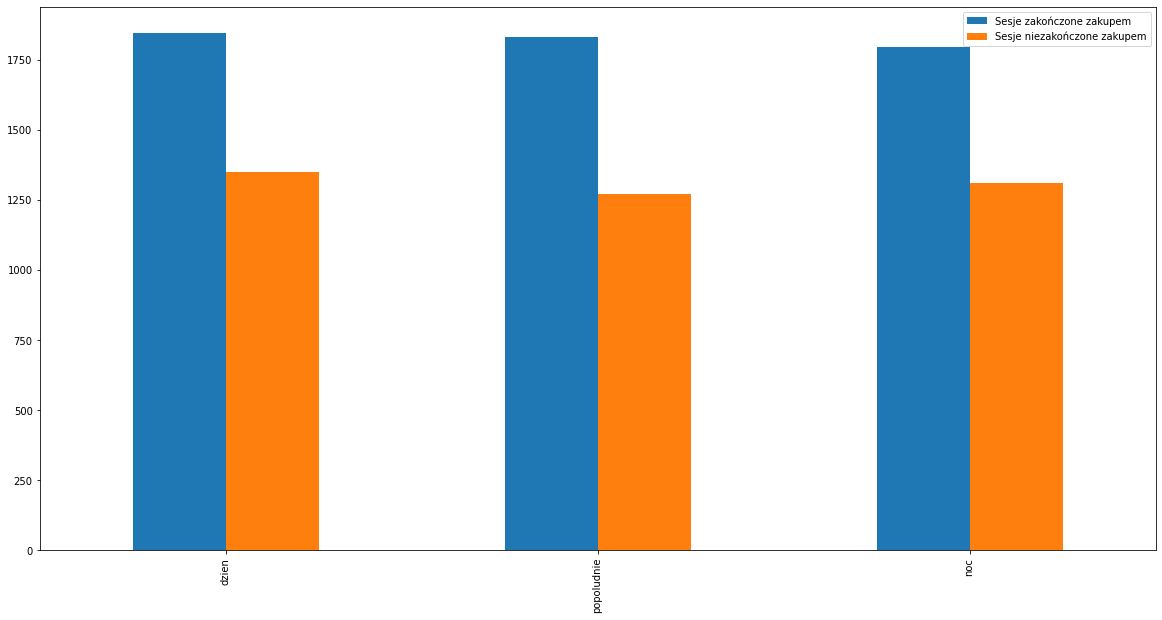

In [360]:
pd.concat([agg_buys['day_period'].value_counts().rename('Sesje zakończone zakupem'), agg_no_buys['day_period'].value_counts().rename('Sesje niezakończone zakupem')], axis=1).plot.bar(figsize=(20,10))

## Stosunek proponowanych zniżek w procentach do zakupień produktów:

<AxesSubplot:>

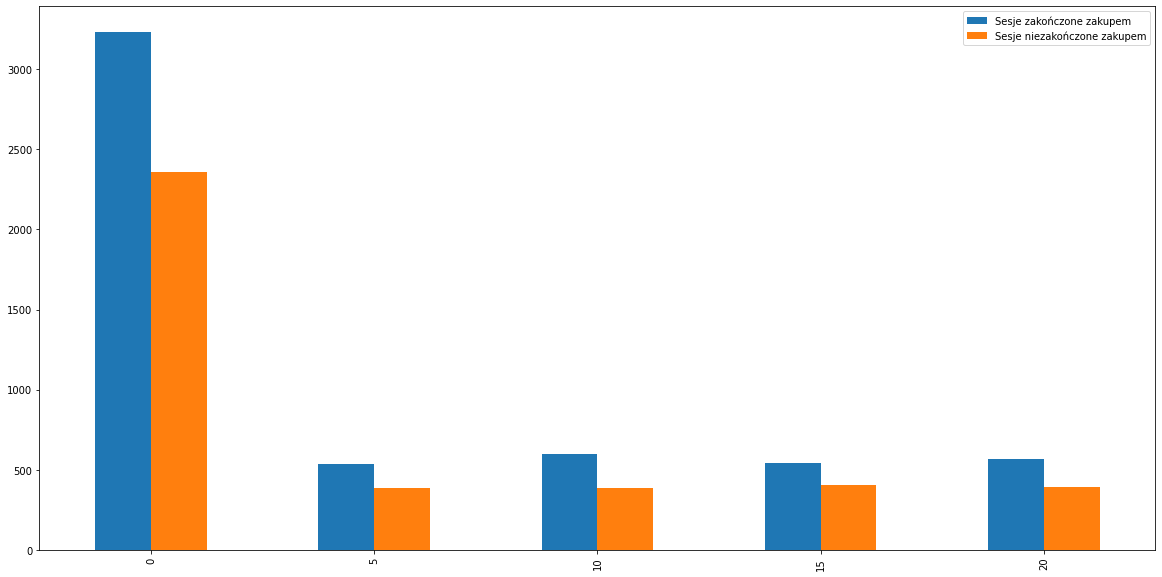

In [361]:
pd.concat([agg_buys['offered_discount'].value_counts().rename('Sesje zakończone zakupem'), agg_no_buys['offered_discount'].value_counts().rename('Sesje niezakończone zakupem')], axis=1).plot.bar(figsize=(20,10))

+ Zależność wysokosci znizki od sumy i sredniej ceny przegladanych zakupow.
+ Uzaleznienie buy_rate kategorii od godziny/pory dnia.

## Stosunek kategorii produktów do stanu zakończenia sesji:

+ Scalenie tabeli z sesjami wraz z kategoriami produktów:

In [362]:
df_merged = df_sessions.merge(new_concatenated, left_on='product_id', right_on='product_id')
df_merged.drop(columns=['product_name', 'category_path'], inplace=True)
df_merged.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,price,Akcesoria telefoniczne,Anteny RTV,Audio,...,Słuchawki,Tablety,Tablety i akcesoria,Telefony i akcesoria,Telefony komórkowe,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe
0,124,2021-07-28 15:47:21,102,1283,VIEW_PRODUCT,5,99.99,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,124,2021-07-28 15:47:40,102,1283,BUY_PRODUCT,5,99.99,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,139,2021-07-01 11:28:02,102,1283,VIEW_PRODUCT,0,99.99,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,139,2021-07-01 11:31:18,102,1283,BUY_PRODUCT,0,99.99,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,144,2021-03-19 13:55:04,102,1283,VIEW_PRODUCT,0,99.99,0,0,0,...,0,0,0,0,0,0,1,1,0,0


+ Agregacja w ramach pojedynczej sesji:

In [363]:
agg_cat_sess_prod = {
    'timestamp' : lambda t: [(t.max() - t.min()).seconds, t.min(), t.max()],
    'user_id' : 'first',
    'product_id' : 'unique',
    'offered_discount' : 'first',
    'event_type' : lambda e: 1 if len(e.unique()) > 1 else 0,
    'price' : lambda t: [t.sum(), t.mean()]
}

for name in df_products_categorical.columns:
    agg_cat_sess_prod[name] = lambda n: n.sum()

agg_merged_df =df_merged.groupby(df_merged['session_id']).aggregate(agg_cat_sess_prod)
agg_merged_df.rename(columns={'event_type' : 'purchased'}, inplace=True)

In [364]:
agg_merged_df.head()

,timestamp,user_id,product_id,offered_discount,purchased,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,...,Słuchawki,Tablety,Tablety i akcesoria,Telefony i akcesoria,Telefony komórkowe,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe
session_id,,,,,,,,,,,,,,,,,,,,,
124,"[19, 2021-07-28 15:47:21, 2021-07-28 15:47:40]",102,[1283],5,1,"[199.98, 99.99]",0,0,0,0,...,0,0,0,0,0,0,2,2,0,0
125,"[1436, 2021-09-12 16:43:16, 2021-09-12 17:07:12]",102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,"[36664.54, 4073.837777777778]",0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
126,"[117, 2021-04-09 22:31:08, 2021-04-09 22:33:05]",102,"[1281, 1278]",15,1,"[222.6, 74.2]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,"[519, 2021-08-15 16:46:06, 2021-08-15 16:54:45]",102,"[1281, 1278]",0,1,"[208.5, 69.5]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,"[847, 2021-01-05 00:05:38, 2021-01-05 00:19:45]",102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,"[568.94, 81.27714285714286]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


+ Wydzielenie znacznika czasowego:

In [365]:
timestamp_dict_2 = [{'session_length' : x[0], 'session_start' : x[1], 'session_end' : x[2]} for x in agg_merged_df['timestamp']]
timestamp_df_2 = pd.DataFrame(timestamp_dict)
agg_merged_df = pd.concat([agg_merged_df, timestamp_df_2], axis=1, join="inner")
agg_merged_df.drop(columns=['timestamp'], inplace=True)
agg_merged_df.head()

,user_id,product_id,offered_discount,purchased,price,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,...,Telefony i akcesoria,Telefony komórkowe,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe,session_length,session_start,session_end
124,102,[1283],5,1,"[199.98, 99.99]",0,0,0,0,0,...,0,0,0,2,2,0,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57
125,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,"[36664.54, 4073.837777777778]",0,0,0,9,9,...,0,0,0,0,0,0,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11
126,102,"[1281, 1278]",15,1,"[222.6, 74.2]",0,0,0,0,0,...,0,0,0,0,0,0,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18
127,102,"[1281, 1278]",0,1,"[208.5, 69.5]",0,0,0,0,0,...,0,0,0,0,0,0,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50
128,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,"[568.94, 81.27714285714286]",0,0,0,0,0,...,0,0,0,0,0,0,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51


+ Wydzielenie sumy i średniej z ceny produktów przeglądanych:

In [366]:
price_dict = [{'sum_price' : x[0], 'price_mean' : x[1]} for x in agg_merged_df['price']]
price_df = pd.DataFrame(price_dict)
agg_merged_df.reset_index(inplace=True)
agg_merged_df = pd.concat([agg_merged_df, price_df], axis=1, join='inner')
agg_merged_df.drop(columns=['price', 'index'], inplace=True)

In [367]:
agg_merged_df.head()

,user_id,product_id,offered_discount,purchased,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe,session_length,session_start,session_end,sum_price,price_mean
0,102,[1283],5,1,0,0,0,0,0,0,...,0,2,2,0,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57,199.98,99.990000
1,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,0,0,0,9,9,0,...,0,0,0,0,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11,36664.54,4073.837778
2,102,"[1281, 1278]",15,1,0,0,0,0,0,0,...,0,0,0,0,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18,222.60,74.200000
3,102,"[1281, 1278]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50,208.50,69.500000
4,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51,568.94,81.277143


+ Podział na sesje zakończone sukcesem i zakończone porażką:

In [368]:
# division of aggregate data on sessions with success and without success
agg_merged_buys = agg_merged_df.loc[agg_merged_df['purchased']==1]
agg_merged_no_buys = agg_merged_df.loc[agg_merged_df['purchased']==0]

# division of sets on categories
agg_merged_buys_on_cat = {column_name: agg_merged_buys.loc[agg_merged_buys[column_name] >= 1] for column_name in df_products_categorical.columns}
agg_merged_no_buys_on_cat = {column_name: agg_merged_no_buys.loc[agg_merged_no_buys[column_name] >= 1] for column_name in df_products_categorical.columns}

+ Zależność liczby sesji zakończonych/nie zakończonych zakupem od kategorii produktów, które są oglądane w danym sklepie:

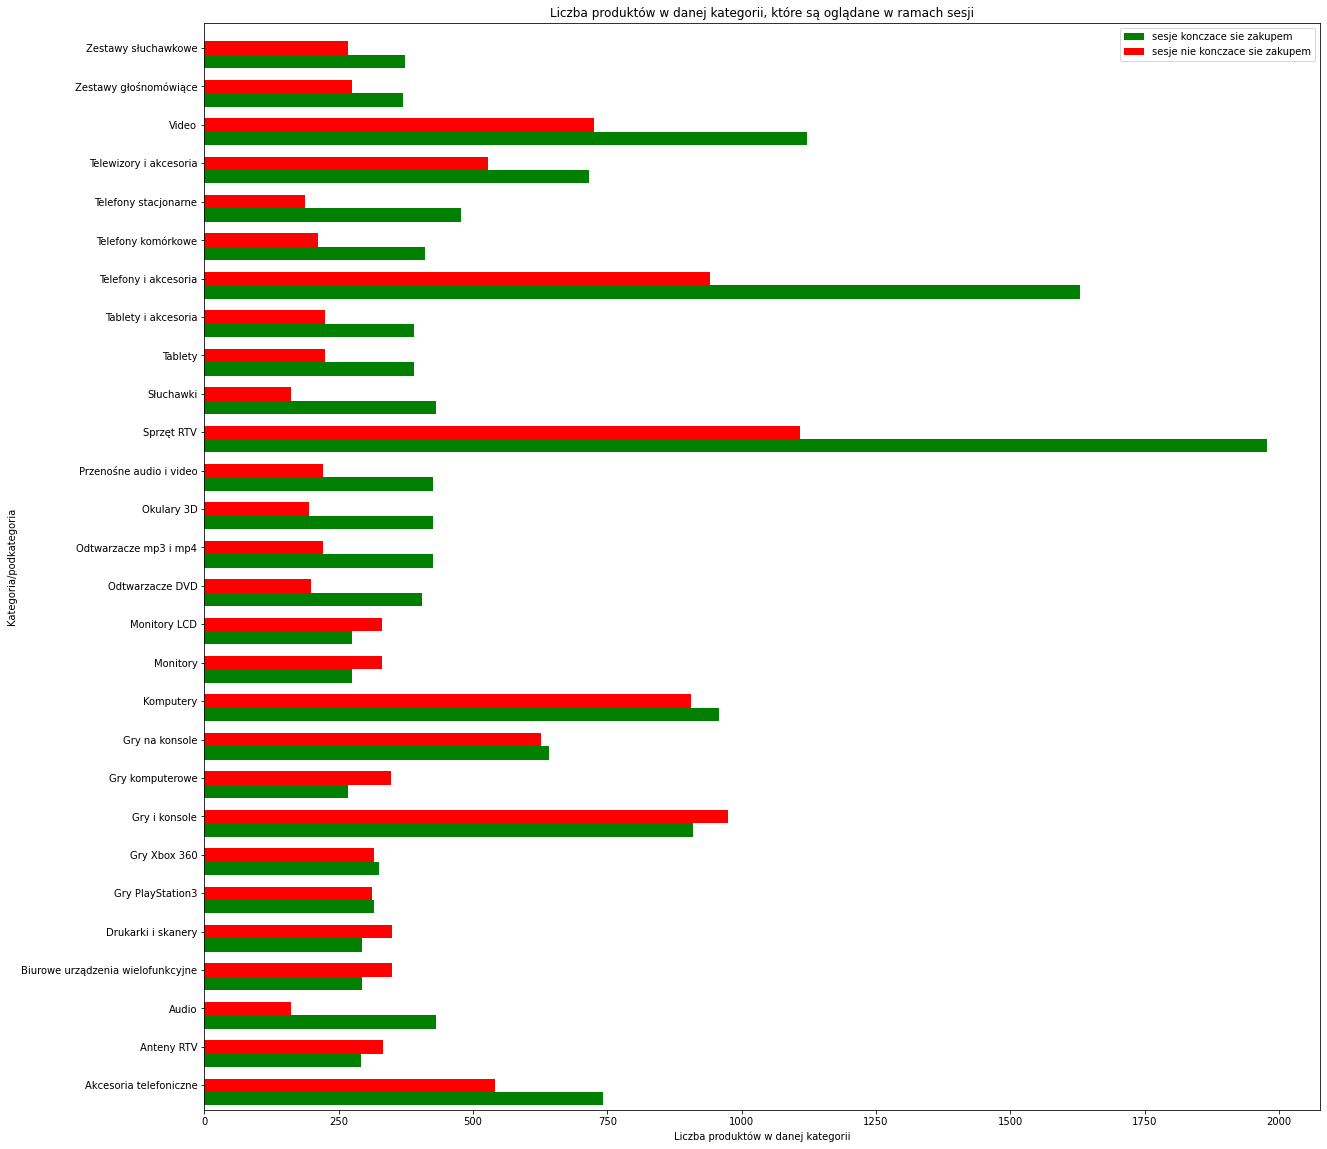

In [369]:
fig, ax = plt.subplots(figsize=(20, 20))

ind = np.arange(len(list(agg_merged_buys_on_cat.keys())))

width = 0.35
ax.barh(ind, [len(agg_merged_buys_on_cat[key]) for key in agg_merged_buys_on_cat.keys()], width, color='green', label='sesje konczace sie zakupem')
ax.barh(ind+width, [len(agg_merged_no_buys_on_cat[key]) for key in agg_merged_buys_on_cat.keys()], width, color='red', label='sesje nie konczace sie zakupem')
ax.set(yticks=ind + width, yticklabels=list(agg_merged_buys_on_cat.keys()), ylim=[2*width -1, len(list(agg_merged_buys_on_cat.keys()))])
ax.legend()
plt.title('Liczba produktów w danej kategorii, które są oglądane w ramach sesji')
plt.xlabel('Liczba produktów w danej kategorii')
plt.ylabel('Kategoria/podkategoria')
plt.show()

## Zależność kupna w sesji od sumy i sredniej ceny przegladanych zakupow.

In [370]:
agg_merged_df[['sum_price', 'price_mean']].describe()

,sum_price,price_mean
count,9403.000000,9403.000000
mean,2782.690768,694.511215
std,6538.559380,1170.032395
min,14.990000,14.990000
25%,199.980000,78.900000
50%,539.870000,129.990000
75%,1816.970000,639.000000
max,45785.540000,7639.000000


+ Podział na przedziały:

In [371]:
bins_sum = [0, 100, 200, 300, 400, 500, 600, 800, 1000, 1300, 1600, 1900, 2500, 5000, 10000, 15000, 25000, 40000, 100000]
bins_mean = [0, 20, 40, 70, 100, 115, 140, 200, 300, 500, 800, 1500, 2500, 4000, 7000, 10000]

agg_merged_sum = pd.cut(agg_merged_df['sum_price'], bins=bins_sum, right=True)

agg_merged_mean = pd.cut(agg_merged_df['price_mean'], bins=bins_mean, right=True)

agg_merged_df_bins = agg_merged_df.copy()
agg_merged_df_bins['sum_price'] = agg_merged_sum
agg_merged_df_bins['price_mean'] = agg_merged_mean
agg_merged_df_bins.head()

,user_id,product_id,offered_discount,purchased,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe,session_length,session_start,session_end,sum_price,price_mean
0,102,[1283],5,1,0,0,0,0,0,0,...,0,2,2,0,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57,"(100, 200]","(70, 100]"
1,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,0,0,0,9,9,0,...,0,0,0,0,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11,"(25000, 40000]","(4000, 7000]"
2,102,"[1281, 1278]",15,1,0,0,0,0,0,0,...,0,0,0,0,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18,"(200, 300]","(70, 100]"
3,102,"[1281, 1278]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50,"(200, 300]","(40, 70]"
4,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51,"(500, 600]","(70, 100]"


+ Podział na zbiory zakup/brak zakupu:

In [372]:
agg_merged_buys_bins = agg_merged_df_bins.loc[agg_merged_df_bins['purchased']==1]
agg_merged_no_buys_bins = agg_merged_df_bins.loc[agg_merged_df_bins['purchased']==0]

+ Funkcja plotująca różnice:

In [373]:
def plot_buys_nobuys_diff(buys_df, nobuys_df, merged_df, column_name, title, xlabel, ylabel, width = 0.35, figsize=(20, 20)):
    fig_diff, ax = plt.subplots(figsize=figsize)
    indexes = np.arange(len(list(merged_df[column_name].value_counts().keys())))
    ax.barh(indexes, buys_df[column_name].value_counts().sort_index(), width, color='green', label='sesje konczace sie zakupem')
    ax.barh(indexes+width, nobuys_df[column_name].value_counts().sort_index(), width, color='red', label='sesje nie konczace sie zakupem')
    ax.set(yticks=indexes + width, yticklabels=list(merged_df[column_name].value_counts().sort_index().keys()), ylim=[2*width -1, len(list(merged_df[column_name].value_counts().sort_index().keys()))])
    ax.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

+ Zależność liczby sesji zakończonych zakupem/jego brakiem od łącznej ceny przeglądanych produktów:

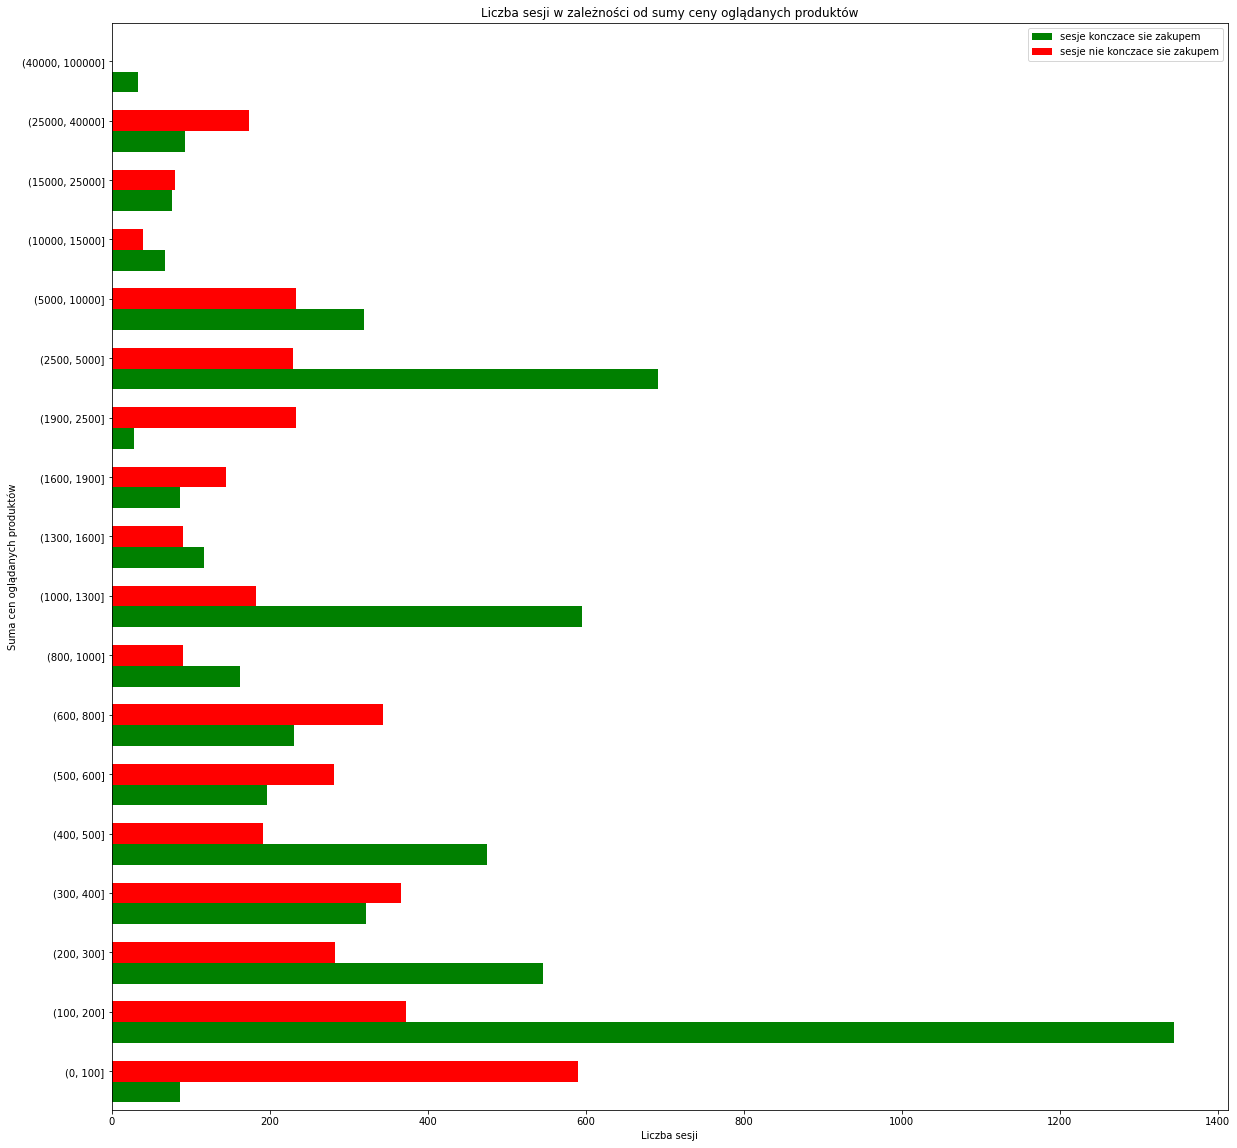

In [374]:
plot_buys_nobuys_diff(buys_df=agg_merged_buys_bins, nobuys_df=agg_merged_no_buys_bins, merged_df=agg_merged_df_bins, column_name='sum_price', title='Liczba sesji w zależności od sumy ceny oglądanych produktów', xlabel='Liczba sesji', ylabel='Suma cen oglądanych produktów')

+ Zależność liczby sesji zakończonych zakupem/jego brakiem od średniej ceny przeglądanych produktów:

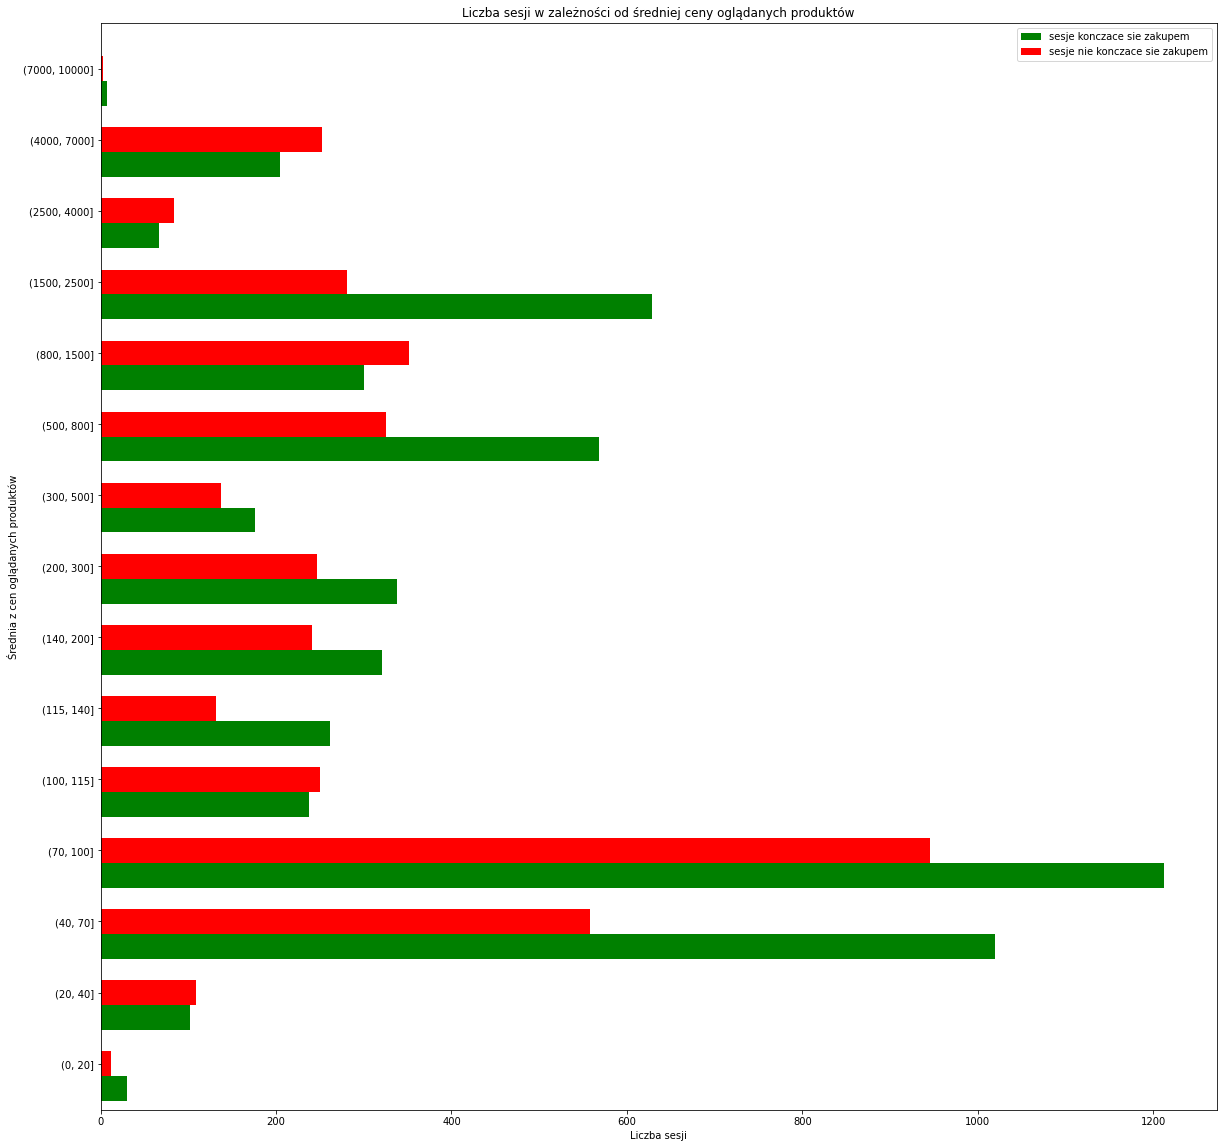

In [375]:
plot_buys_nobuys_diff(buys_df=agg_merged_buys_bins, nobuys_df=agg_merged_no_buys_bins, merged_df=agg_merged_df_bins, column_name='price_mean', title='Liczba sesji w zależności od średniej ceny oglądanych produktów', xlabel='Liczba sesji', ylabel='Średnia z cen oglądanych produktów')

## Zależność kupna w sesji od sumy i sredniej ceny zniżki (w kwocie)

+ Przygotowanie kolumn:

In [376]:
agg_merged_df.head()

,user_id,product_id,offered_discount,purchased,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Telefony stacjonarne,Telewizory i akcesoria,Video,Zestawy głośnomówiące,Zestawy słuchawkowe,session_length,session_start,session_end,sum_price,price_mean
0,102,[1283],5,1,0,0,0,0,0,0,...,0,2,2,0,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57,199.98,99.990000
1,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,0,0,0,9,9,0,...,0,0,0,0,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11,36664.54,4073.837778
2,102,"[1281, 1278]",15,1,0,0,0,0,0,0,...,0,0,0,0,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18,222.60,74.200000
3,102,"[1281, 1278]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50,208.50,69.500000
4,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,0,0,0,0,0,0,...,0,0,0,0,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51,568.94,81.277143


In [377]:
sum_discount = []
mean_discount = []
for discout, sum_price, mean_price in zip(agg_merged_df['offered_discount'], agg_merged_df['sum_price'], agg_merged_df['price_mean']):
    sum_discount.append(round(discout/100 * sum_price,2))
    mean_discount.append(round(discout/100 * mean_price,2))

In [378]:
agg_merged_discounts = copy(agg_merged_df)
agg_merged_discounts['sum_discount'] = sum_discount
agg_merged_discounts['mean_discount'] = mean_discount

In [379]:
agg_merged_discounts.head()

,user_id,product_id,offered_discount,purchased,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Video,Zestawy głośnomówiące,Zestawy słuchawkowe,session_length,session_start,session_end,sum_price,price_mean,sum_discount,mean_discount
0,102,[1283],5,1,0,0,0,0,0,0,...,2,0,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57,199.98,99.990000,10.00,5.00
1,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,0,0,0,9,9,0,...,0,0,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11,36664.54,4073.837778,0.00,0.00
2,102,"[1281, 1278]",15,1,0,0,0,0,0,0,...,0,0,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18,222.60,74.200000,33.39,11.13
3,102,"[1281, 1278]",0,1,0,0,0,0,0,0,...,0,0,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50,208.50,69.500000,0.00,0.00
4,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,0,0,0,0,0,0,...,0,0,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51,568.94,81.277143,0.00,0.00


+ Podział na zakresy:

In [380]:
agg_merged_discounts[['sum_discount', 'mean_discount']].describe()

,sum_discount,mean_discount
count,9403.000000,9403.000000
mean,141.631848,35.002403
std,600.387820,112.033994
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,38.925000,11.915000
max,8689.690000,1204.460000


In [381]:
bins_disc_sum = [-1, 10, 20, 35, 50, 100, 130, 180, 300, 600, 1300, 2000, 4000, 6000, 8000, 10000]
bins_disc_mean = [-1, 5, 10, 15, 20, 25, 30, 35, 50, 80, 150, 300, 500, 800, 1050, 1300]

agg_merged_disc_sum = pd.cut(agg_merged_discounts['sum_discount'], bins=bins_disc_sum, right=True)

agg_merged_disc_mean = pd.cut(agg_merged_discounts['mean_discount'], bins=bins_disc_mean, right=True)

agg_merged_disc_bins = copy(agg_merged_discounts)
agg_merged_disc_bins['sum_discount_bin'] = agg_merged_disc_sum
agg_merged_disc_bins['mean_discount_bin'] = agg_merged_disc_mean

In [382]:
agg_merged_disc_bins

,user_id,product_id,offered_discount,purchased,Akcesoria telefoniczne,Anteny RTV,Audio,Biurowe urządzenia wielofunkcyjne,Drukarki i skanery,Gry PlayStation3,...,Zestawy słuchawkowe,session_length,session_start,session_end,sum_price,price_mean,sum_discount,mean_discount,sum_discount_bin,mean_discount_bin
0,102,[1283],5,1,0,0,0,0,0,0,...,0,725,2021-08-26 22:27:52,2021-08-26 22:39:57,199.98,99.990000,10.00,5.00,"(-1, 10]","(-1, 5]"
1,102,"[1076, 1080, 1079, 1003, 1002, 1075, 1078, 1077]",0,1,0,0,0,9,9,0,...,0,1547,2021-03-08 08:14:24,2021-03-08 08:40:11,36664.54,4073.837778,0.00,0.00,"(-1, 10]","(-1, 5]"
2,102,"[1281, 1278]",15,1,0,0,0,0,0,0,...,0,347,2021-02-16 17:40:31,2021-02-16 17:46:18,222.60,74.200000,33.39,11.13,"(20, 35]","(10, 15]"
3,102,"[1281, 1278]",0,1,0,0,0,0,0,0,...,0,457,2021-03-13 06:48:13,2021-03-13 06:55:50,208.50,69.500000,0.00,0.00,"(-1, 10]","(-1, 5]"
4,102,"[1008, 1007, 1013, 1012, 1004, 1010]",0,1,0,0,0,0,0,0,...,0,1010,2021-04-18 21:02:01,2021-04-18 21:18:51,568.94,81.277143,0.00,0.00,"(-1, 10]","(-1, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,300,"[1319, 1315, 1317]",5,1,4,0,0,0,0,0,...,4,0,2021-01-27 03:30:15,2021-01-27 03:30:15,2677.90,669.475000,133.90,33.47,"(130, 180]","(30, 35]"
9399,300,"[1076, 1080, 1079, 1002, 1075, 1078, 1081]",0,1,0,0,0,8,8,0,...,0,116,2021-07-06 16:22:43,2021-07-06 16:24:39,31328.54,3916.067500,0.00,0.00,"(-1, 10]","(-1, 5]"
9400,300,"[1290, 1293, 1287, 1288, 1285, 1291, 1289, 128...",5,1,0,10,0,0,0,0,...,0,1617,2021-03-07 07:27:50,2021-03-07 07:54:47,1121.66,112.166000,56.08,5.61,"(50, 100]","(5, 10]"
9401,300,"[1079, 1002, 1078, 1081]",0,0,0,0,0,4,4,0,...,0,0,2021-10-12 00:19:45,2021-10-12 00:19:45,17031.50,4257.875000,0.00,0.00,"(-1, 10]","(-1, 5]"


In [383]:
agg_merged_buys_disc_bins = agg_merged_disc_bins.loc[agg_merged_disc_bins['purchased']==1]
agg_merged_no_buys_disc_bins = agg_merged_disc_bins.loc[agg_merged_disc_bins['purchased']==0]

+ Stosunek liczby sesji zakończonych/niezakończonych zakupem do sumy ze zniżki w kwocie:

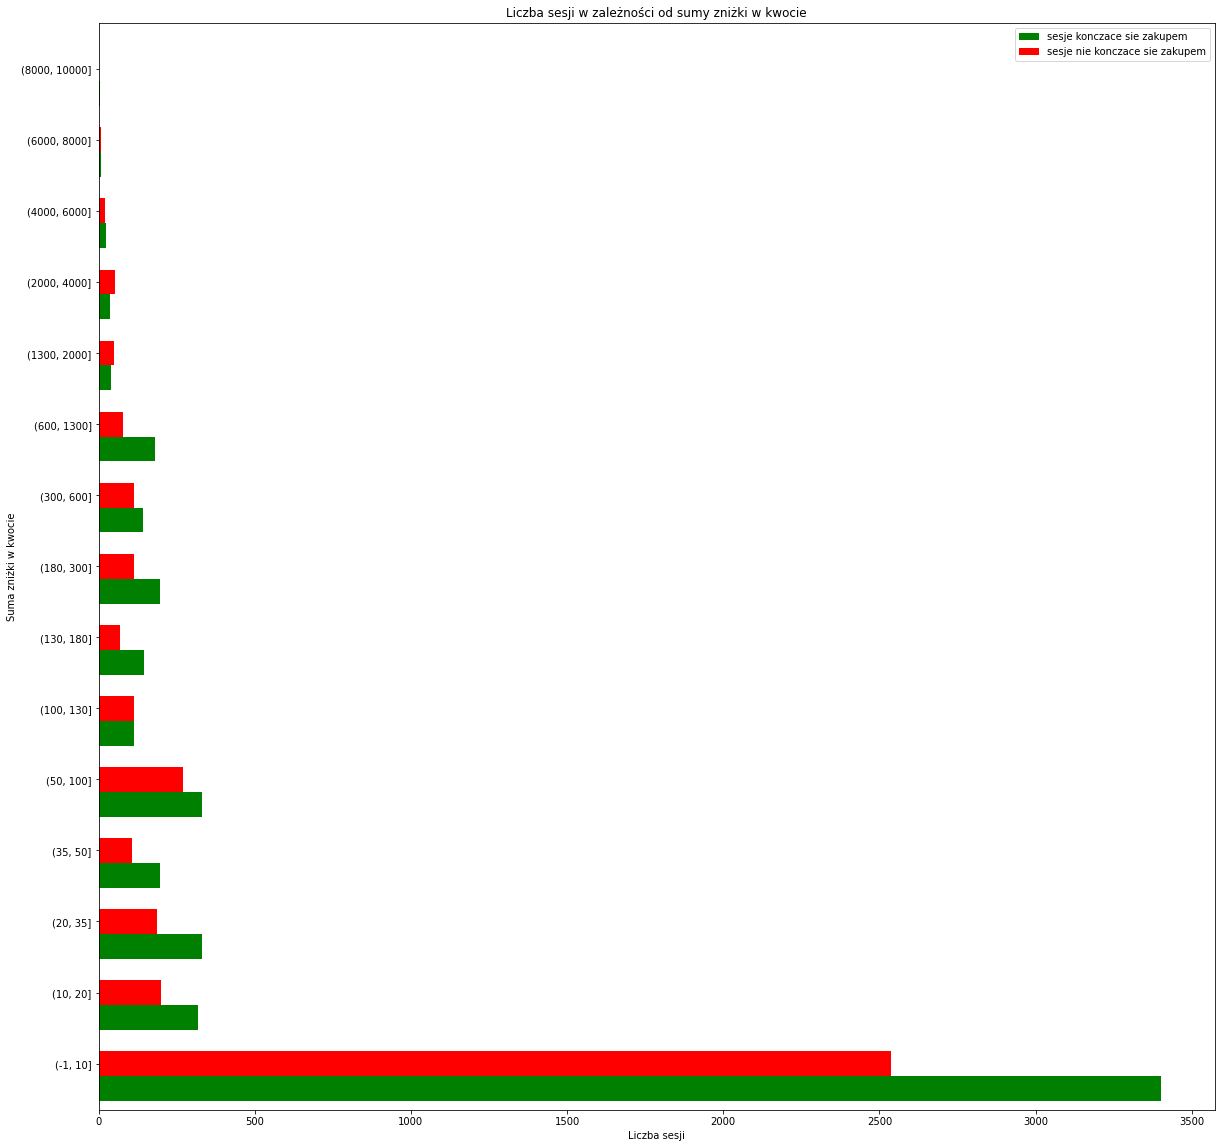

In [384]:
plot_buys_nobuys_diff(buys_df=agg_merged_buys_disc_bins, nobuys_df=agg_merged_no_buys_disc_bins, merged_df=agg_merged_disc_bins, column_name='sum_discount_bin', title='Liczba sesji w zależności od sumy zniżki w kwocie', xlabel='Liczba sesji', ylabel='Suma zniżki w kwocie')

+ Stosunek liczby sesji zakończonych/niezakończonych zakupem do średniej ze zniżki w kwocie:

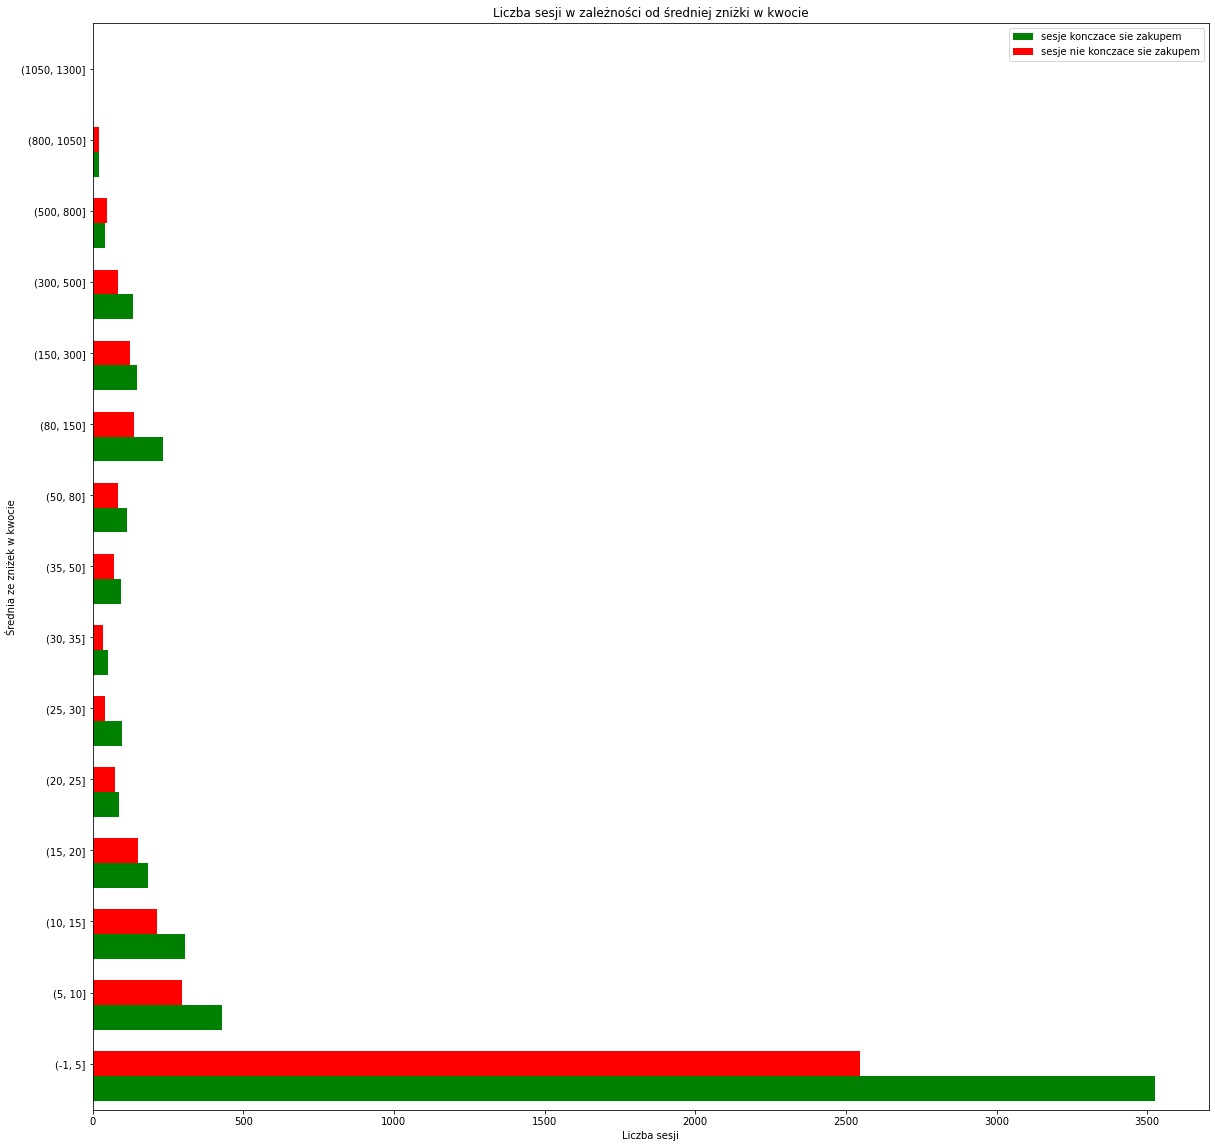

In [385]:
plot_buys_nobuys_diff(buys_df=agg_merged_buys_disc_bins, nobuys_df=agg_merged_no_buys_disc_bins, merged_df=agg_merged_disc_bins, column_name='mean_discount_bin', title='Liczba sesji w zależności od średniej zniżki w kwocie', xlabel='Liczba sesji', ylabel='Średnia ze zniżek w kwocie')

## UWAGI:
+ Nie uwzgledniamy nazw produktów bo dodanie do sklepu jednego produktu by psulo caly model.